## Visualizing Learning
Now that we know how to load models from checkpoints, we can sample synthetic data from the loaded model as well as visualize the saved statistics. 

In [1]:
#Matplotlib imports
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

In [3]:
from utils.misc import loadHDF5

### Training and Validation Bounds
Note that you can change what is saved at intervals during training in `prefix-EP<#>-stats.h5` in `model_th/learning.py`. For now, we have just saved the validation and training bound. 

In [6]:
#Lets look at the statistics saved at epoch 40
stats = loadHDF5('./chkpt-ipython/DMM_lr-0_0008-dh-40-ds-2-nl-relu-bs-200-ep-40-rs-80-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP40-stats.h5')
print [(k,stats[k].shape) for k in stats.keys()]

[(u'valid_bound', (5, 2)), (u'train_bound', (41, 2))]


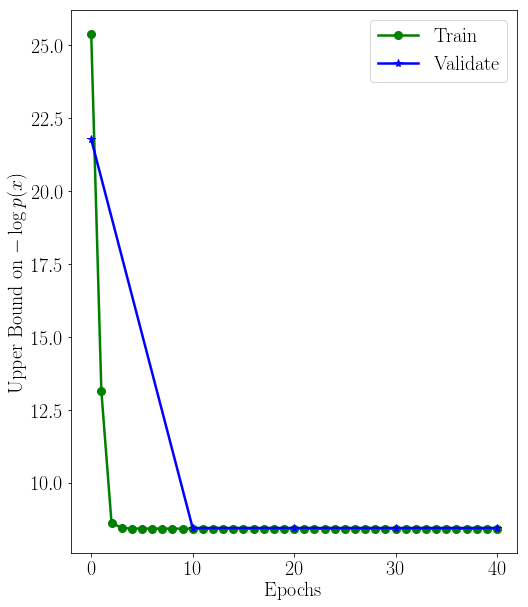

In [10]:
plt.figure(figsize=(8,10))
plt.plot(stats['train_bound'][:,0],stats['train_bound'][:,1],'-o',color='g',label='Train')
plt.plot(stats['valid_bound'][:,0],stats['valid_bound'][:,1],'-*',color='b',label='Validate')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Upper Bound on $-\log p(x)$')

### Sampling from the Model
Lets load a model now and use the helper functions defined in `model_th/evaluate.py` to evaluate the learned model.